In [122]:
# Miguel Roca García

**TO DO:**
- Investigar recomendaciones, pautas y estrategias para un correcto preprocesamiento de un dataset
- Investigar todas los modelos de regresión y diferentes aproximaciones que se pueden realizar
- Decisión de todos los algoritmos vamos a aplicar
- Hacer árbol de decisión para registrar todas las posibles pruebas a realizar
- Investigar Power BI y Redes Neurales + Deep Learning

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

**TO DO Inmediato**
- Ver vídeos de análisis y preprocesamiento de datos:
    - Best way to fill nan for machine learning
- Análisis de datos + preprocesar
- Rellenar NaN
    - Media 
    - Mediana
    - Interpolar y extrapolar
    - KNN
    - Autoencoder(Redes Neuronales)
- Normalizar, eliminar ouutliers y demás
- Si tengo muchas features puedo seleccionar las K más relevantes con sklearn.feature selection.SelectKBest(k=K) 
- Aumentar features con interactions? (Combinaciones de varias features)
- Reducción de dimensionalidad??? y añadirlas a las q  ya tengo

A **Box Cox transformation** is a transformation of a non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests

**Notas**
- Considerar añadir total population(Monaco (y Macao) es pequeñito y tiene una esperanza muy alta)
- Añadir GNI per cápita

# Importar Librerías

In [123]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from statsmodels.nonparametric.kde import KDEUnivariate
import urllib.request as ur
import warnings
warnings.filterwarnings("ignore")

# Importar Dataset

In [124]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/UnifiedDataset.csv', sep=',')

In [125]:
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing

In [126]:
def histNaNs(df):
    df.reset_index(drop=True, inplace=True)
    nans = []
    for i in range(df.shape[0]):
        nans.append(df.loc[i].isna().sum().sum())
    n_nans = np.array(nans)
    sns.histplot(n_nans)

# Análisis exploratorio y limpieza de datos

### Análisis general

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 110 entries, Country to Income per Capita
dtypes: float64(107), int64(1), object(2)
memory usage: 18.5+ MB


In [128]:
df.describe()

,Year,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing Urban,Basic Ha

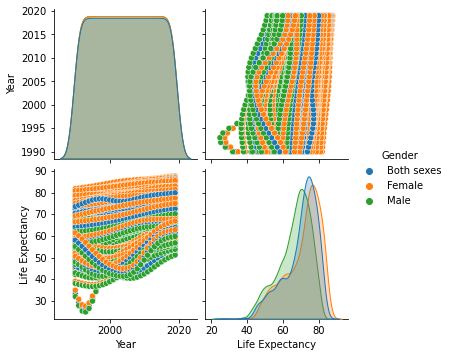

In [129]:
sns.pairplot(df[['Year', 'Gender', 'Life Expectancy']], hue='Gender')

### Life Expectancy

In [130]:
df[['Life Expectancy']].describe()

,Life Expectancy
count,22050.000000
mean,69.011830
std,9.691938
min,24.834000
25%,63.082000
50%,71.134000
75%,76.254000
max,87.747000


<AxesSubplot:xlabel='Life Expectancy', ylabel='Density'>

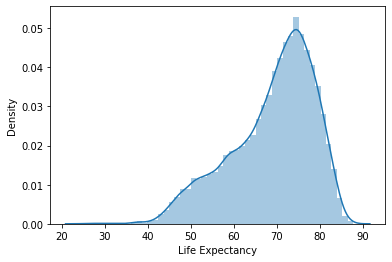

In [131]:
sns.distplot(df['Life Expectancy'])

Text(0, 0.5, 'Density')

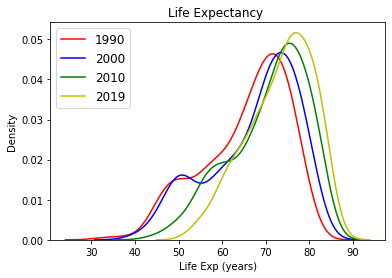

In [132]:
#Gráfica de la media por año
sns.distplot(df['Life Expectancy'][df['Year'] == 1990], hist=False, label='1990', color='r')
sns.distplot(df['Life Expectancy'][df['Year'] == 2000], hist=False, label='2000', color='b')
sns.distplot(df['Life Expectancy'][df['Year'] == 2010], hist=False, label='2010', color='g')
sns.distplot(df['Life Expectancy'][df['Year'] == 2019], hist=False, label='2019', color='y')
plt.legend(prop={'size': 12})
plt.title('Life Expectancy ')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')

In [133]:
#Ver incremento o cambio por país

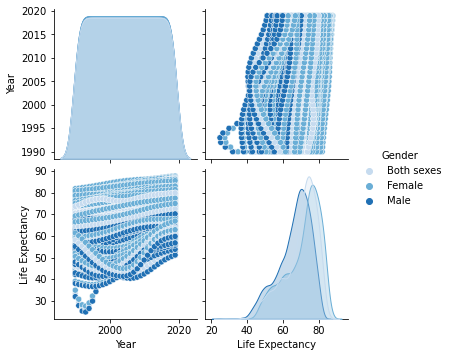

In [134]:
#Ver diferencia por género
sns.pairplot(df[['Country', 'Year', 'Gender', 'Life Expectancy']], hue='Gender', palette='Blues')

In [135]:
# Analizar valores max y  min
df[df['Life Expectancy'] < 40][['Country','Year', 'Gender', 'Life Expectancy']]

,Country,Year,Gender,Life Expectancy
16410,Rwanda,1990,Both sexes,33.413
16411,Rwanda,1990,Female,34.941
16412,Rwanda,1990,Male,31.941
16413,Rwanda,1991,Both sexes,29.248
16414,Rwanda,1991,Female,30.761
16415,Rwanda,1991,Male,27.800
16416,Rwanda,1992,Both sexes,26.691
16417,Rwanda,1992,Female,28.161
16418,Rwanda,1992,Male,25.288
16419,Rwanda,1993,Both sexes,26.172


In [136]:
#Outlier Detection
#Turkey IQR
#Values below Q1-1.5*(Q3-Q1) or above Q3+1.5*(Q3-Q1)
def find_outliers_Turkey(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    floor = q1 - 1.5 * (q3-q1)
    ceiling = q3 + 1.5 * (q3-q1)
    outlier_values = x[(x < floor)|(x>ceiling)]
    return outlier_values

<AxesSubplot:xlabel='Life Expectancy', ylabel='Density'>

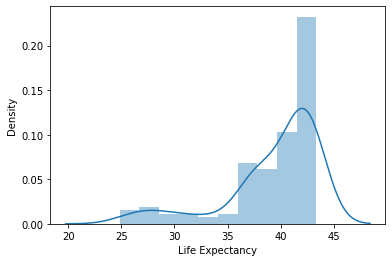

In [137]:
outliers_LifeExpectancy = find_outliers_Turkey(df['Life Expectancy'])
sns.distplot(outliers_LifeExpectancy)

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

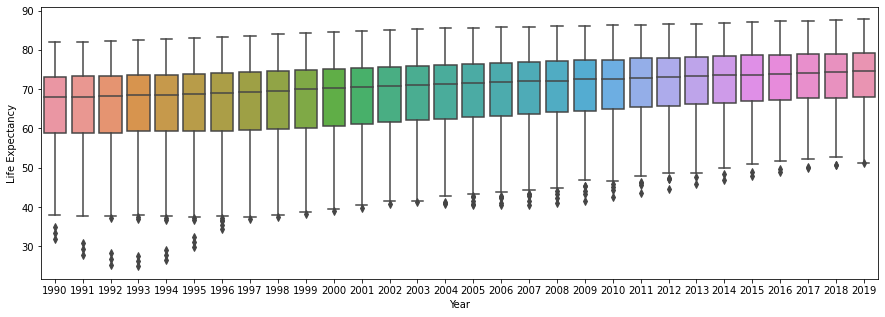

In [138]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year', y='Life Expectancy', data=df)

In [139]:
#Se puede estandarizar la variable objetivo?

### Country

In [140]:
df[['Country']].describe()

,Country
count,22050
unique,281
top,Ecuador
freq,90


In [141]:
#Hay 281 países, habiendo 195 según la ONU(193 miembros y 2 observadores), por tanto vamos a eliminar aquellas filas que no son de países.

In [142]:
df['Country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia, Central',
       'Australia', 'Australia & New Zealand', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Caribbean', 'Cayman Islands',
       'Central African Republic', 'Central America',
       'Central and Southern Asia', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo'

In [143]:
#Obtenemos los países reconocidos por la ONU presentes en el dataset
f = ur.urlopen('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/UNRecognisedCountries.txt')
s = f.read().decode()
f.close()
UNCountries = s.split('\n')
print('Número de países: ', len(UNCountries))
UNCountries

Número de países:  195


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',

In [144]:
#Valores del dataset que no son países
notUNCountries = []
for country in df['Country'].unique():
    if(country not in UNCountries):
        notUNCountries.append(country)
notUNCountries

['Africa',
 'American Samoa',
 'Americas',
 'Anguilla',
 'Argentina',
 'Aruba',
 'Asia',
 'Asia, Central',
 'Australia & New Zealand',
 'Bermuda',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Caribbean',
 'Cayman Islands',
 'Central America',
 'Central and Southern Asia',
 'Channel Islands',
 'Cook Islands',
 'Curacao',
 'Democratic Republic of Congo',
 'Eastern Africa',
 'Eastern Asia',
 'Eastern Europe',
 'Eastern and South-Eastern Asia',
 'Europe',
 'Europe and Northern America',
 'Europe, Western',
 'Faeroe Islands',
 'Falkland Islands',
 'French Guiana',
 'French Polynesia',
 'Gibraltar',
 'Greenland',
 'Guadeloupe',
 'Guam',
 'High income countries',
 'Hong Kong',
 'Isle of Man',
 'Land-locked Developing Countries (LLDC)',
 'Latin America and the Caribbean',
 'Least Developed Countries',
 'Less Developed Regions',
 'Less Developed Regions, excluding China',
 'Less Developed Regions, excluding Least Developed Countries',
 'Low-income countries',
 'Lower-middle-

In [145]:
#Observamos que Democratic Republic of Congo está en la lista de países como Congo. 
# Sin embargo, tan solo tiene el valor de Life Expectancy(con los mismos valores), por lo tanto también se eliminarán
# estas filas

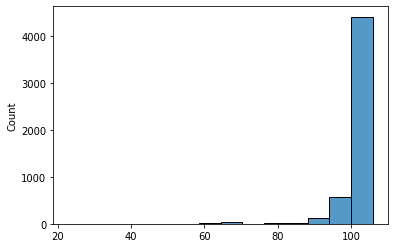

In [146]:
#Número de NaNs que hay en las filas que no son países
df_notUN = df[df['Country'].isin(notUNCountries)].reset_index(drop=True)
histNaNs(df[df['Country'].isin(notUNCountries)])

In [147]:
#Eliminamos aquellas filas que no son países
df = df[df['Country'].isin(UNCountries)]

In [148]:
def cleanCountry(df):
    df = df[df['Country'].isin(UNCountries)]#Eliminamos aquellas filas que no son de países
    return df

In [149]:
df = cleanCountry(df)

In [150]:
df.shape

(16830, 110)

### Year

In [151]:
df[['Year']].describe()

,Year
count,16830.000000
mean,2004.500000
std,8.655699
min,1990.000000
25%,1997.000000
50%,2004.500000
75%,2012.000000
max,2019.000000


<AxesSubplot:xlabel='Year', ylabel='Count'>

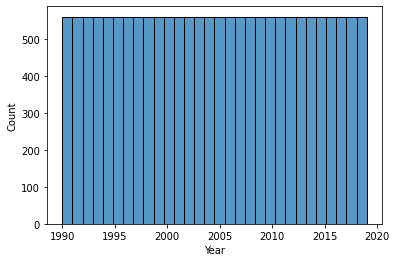

In [152]:
sns.histplot(df['Year'],bins=30)

<AxesSubplot:xlabel='Year', ylabel='Life Expectancy'>

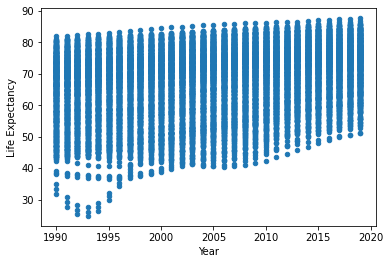

In [153]:
df.plot(kind='scatter', y='Life Expectancy', x ='Year')

In [154]:
df[df['Year']==1991].shape

(561, 110)

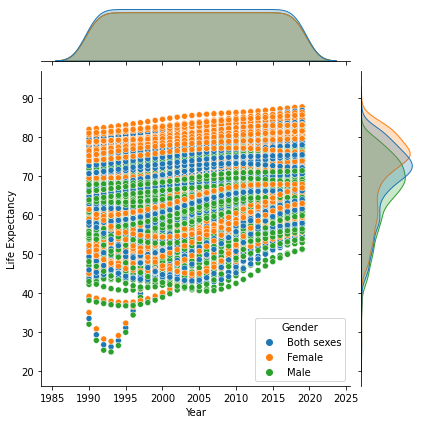

In [155]:
sns.jointplot(x='Year', y='Life Expectancy', data=df, hue='Gender')

### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

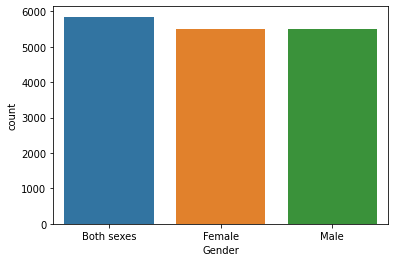

In [156]:
# Detectamos que hay más filas con both sexes que female y male
sns.countplot(x='Gender', data=df)

In [157]:
#Países de los que solo se tiene both sexes y no male y female
df_count_gender = df.groupby(['Country', 'Year']).size().reset_index().rename(columns={0: 'Count'})
countries_bothsexes = df_count_gender[df_count_gender['Count'] == 1]['Country'].unique() #Países de los que solo se tiene both sexes
countries_bothsexes

array(['Andorra', 'Dominica', 'Liechtenstein', 'Marshall Islands',
       'Monaco', 'Nauru', 'Niue', 'Palau', 'Saint Kitts and Nevis',
       'San Marino', 'Tuvalu', 'Vatican'], dtype=object)

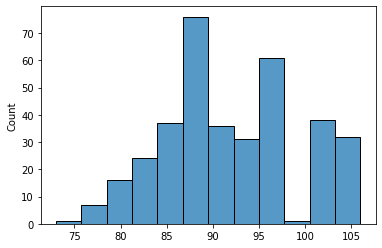

In [158]:
#Número de NaNs que hay en las filas de países que solo tienen both sexes
histNaNs(df[df['Country'].isin(countries_bothsexes)])

In [159]:
#En un principio voy a dejar estas filas pero me volveré a plantear eliminarlas

### Infant Mortality Rate

The infant mortality rate is the number of infant deaths for every 1,000 live births


In [161]:
df[['Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate']].describe()

,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate
count,13437.000000,13437.000000,13437.000000
mean,33.873780,30.292168,38.211353
std,32.701673,29.823689,36.649036
min,1.420000,0.780000,1.780000
25%,7.920000,7.420000,8.540000
50%,21.320000,18.440000,24.460000
75%,51.640000,44.950000,58.540000
max,189.200000,173.300000,207.600000


In [162]:
#Número de valores NaN
df['Infant Mortality Rate'].isna().sum()

3393

<AxesSubplot:xlabel='Infant Mortality Rate', ylabel='Count'>

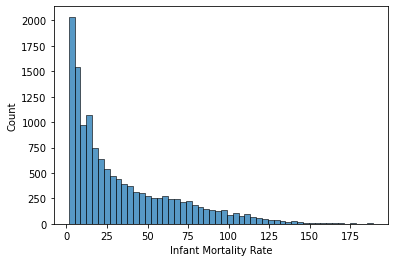

In [201]:
sns.histplot(df['Infant Mortality Rate'])

Text(0, 0.5, 'Density')

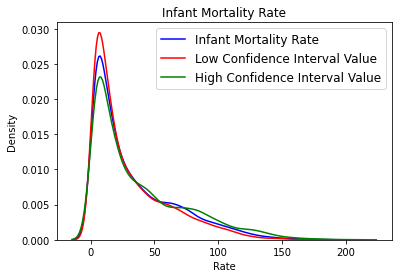

In [200]:
sns.kdeplot(df['Infant Mortality Rate'], label='Infant Mortality Rate', color='b',)
sns.kdeplot(df['Low CI Value Infant Mortality Rate'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value Infant Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Infant Mortality Rate')
plt.xlabel('Rate')
plt.ylabel('Density')

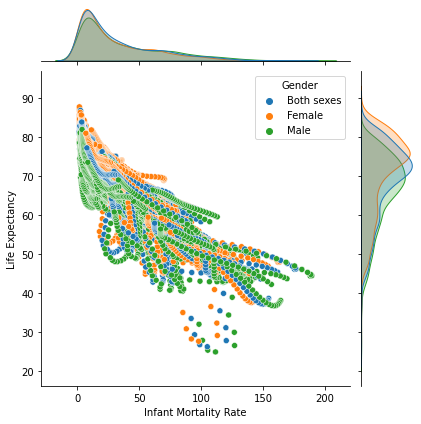

In [244]:
sns.jointplot(x='Infant Mortality Rate', y='Life Expectancy', data=df, hue='Gender')

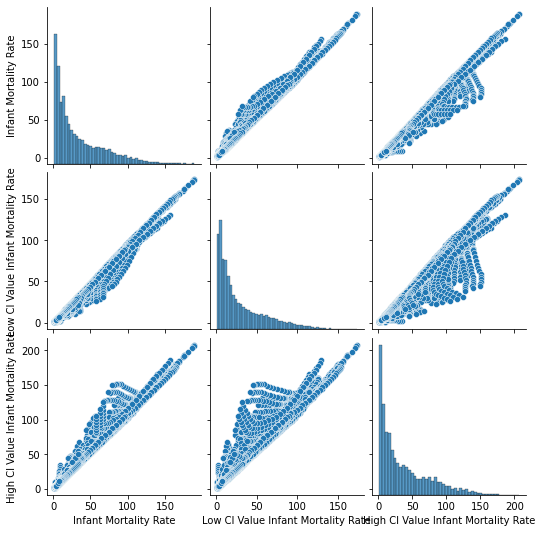

In [180]:
sns.pairplot(df[['Infant Mortality Rate', 'Low CI Value Infant Mortality Rate', 'High CI Value Infant Mortality Rate']])

### Under 5 Mortality Rate

The under-five mortality rate is the number of deaths of infants and children under five years old per 1000 live births


In [181]:
df[['Under 5 Mortality Rate', 'Low CI Value Under 5 Mortality Rate', 'High CI Value Under 5 Mortality Rate']].describe()

,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate
count,13437.000000,13437.000000,13437.000000
mean,49.009727,43.289297,56.109021
std,54.347837,49.074872,61.562837
min,1.680000,0.850000,2.220000
25%,9.330000,8.740000,10.010000
50%,25.210000,21.800000,29.140000
75%,72.890000,61.730000,84.570000
max,331.100000,309.400000,354.400000


In [182]:
#Número de valores NaN
df['Under 5 Mortality Rate'].isna().sum()

3393

<AxesSubplot:xlabel='Under 5 Mortality Rate', ylabel='Count'>

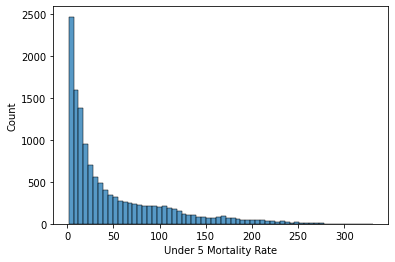

In [243]:
sns.histplot(df['Under 5 Mortality Rate'], label='Under 5 Mortality Rate')

Text(0.5, 1.0, 'Under 5 Mortality Rate ')

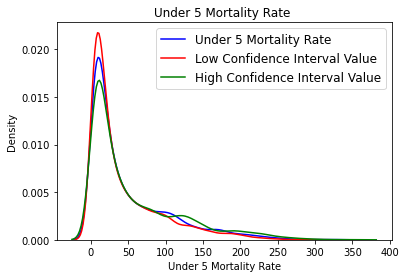

In [199]:
sns.kdeplot(df['Under 5 Mortality Rate'], label='Under 5 Mortality Rate', color='b',)
sns.kdeplot(df['Low CI Value Under 5 Mortality Rate'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value Under 5 Mortality Rate'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('Under 5 Mortality Rate')

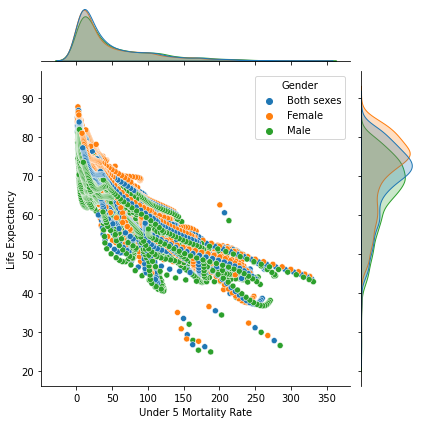

In [240]:
sns.jointplot(x='Under 5 Mortality Rate', y='Life Expectancy', data=df, hue='Gender')

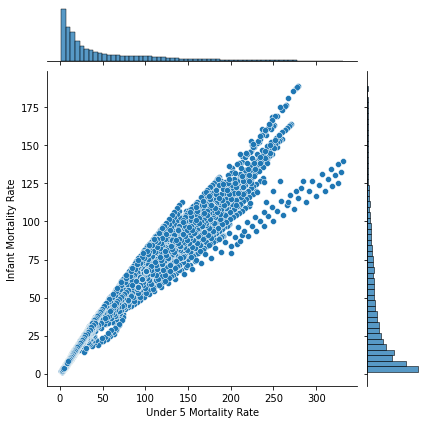

In [189]:
sns.jointplot(x='Under 5 Mortality Rate', y='Infant Mortality Rate', data=df)

### 

# % Death Cardiovascular

Probabilidad de morir por problemas cardiovasculares entre los 30 y los 70 años

In [208]:
df[['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular']].describe()

,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular
count,9780.000000,9780.000000,9780.000000
mean,22.139100,16.085930,29.163507
std,9.018574,6.649695,12.506450
min,5.700000,3.900000,6.300000
25%,15.600000,11.600000,19.200000
50%,21.300000,14.700000,28.700000
75%,27.200000,19.300000,37.000000
max,64.100000,49.500000,76.900000


In [209]:
df['% Death Cardiovascular'].isna().sum()

7050

<AxesSubplot:xlabel='% Death Cardiovascular', ylabel='Count'>

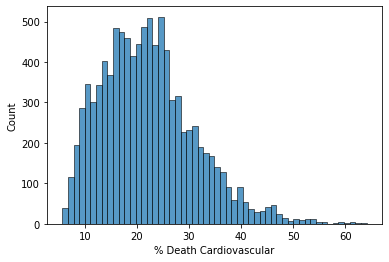

In [198]:
sns.histplot(df['% Death Cardiovascular'])

Text(0.5, 1.0, '% Death Cardiovascular')

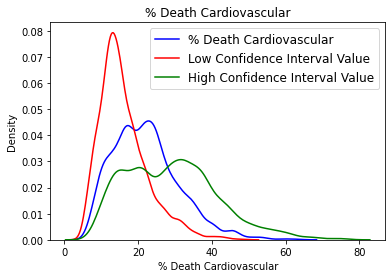

In [202]:
sns.kdeplot(df['% Death Cardiovascular'], label='% Death Cardiovascular', color='b',)
sns.kdeplot(df['Low CI Value % Death Cardiovascular'], label='Low Confidence Interval Value', color='r')
sns.kdeplot(df['High CI Value % Death Cardiovascular'], label='High Confidence Interval Value', color='g')
plt.legend(prop={'size': 12})
plt.title('% Death Cardiovascular')

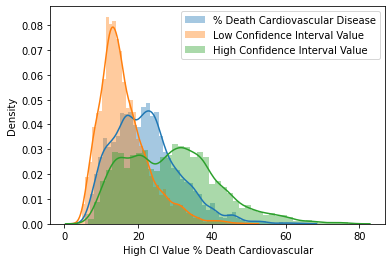

In [207]:
sns.distplot(df['% Death Cardiovascular'], label='% Death Cardiovascular Disease')
sns.distplot(df['Low CI Value % Death Cardiovascular'], label='Low Confidence Interval Value')
sns.distplot(df['High CI Value % Death Cardiovascular'], label='High Confidence Interval Value',)
plt.legend()


In [ ]:
#Detectamos un intervalo de confianza mucho mayor

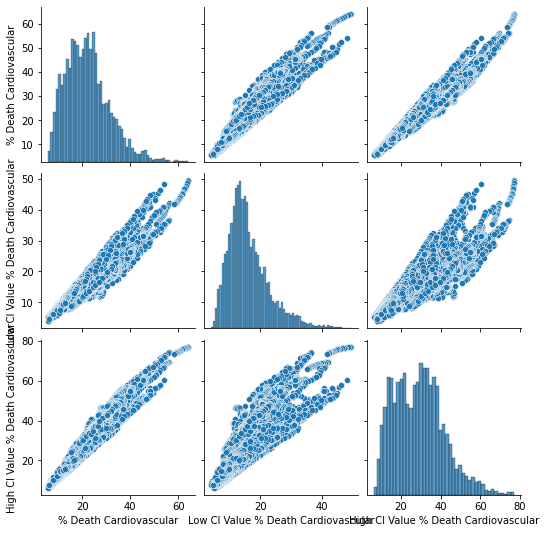

In [210]:
sns.pairplot(df[['% Death Cardiovascular', 'Low CI Value % Death Cardiovascular', 'High CI Value % Death Cardiovascular']])

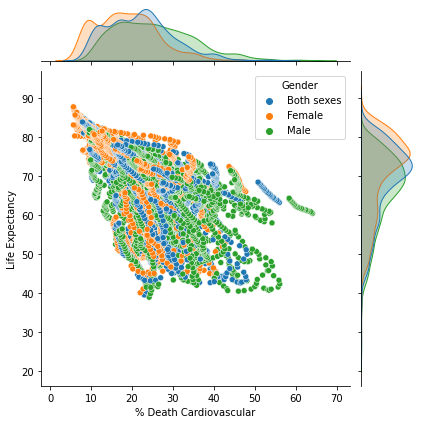

In [215]:
sns.jointplot(x='% Death Cardiovascular', y='Life Expectancy', data=df, hue='Gender')

# Suicide Rates

Crude suicide rates (per 100 000 population)

In [216]:
df[['Suicides Rate']].describe()

,Suicides Rate
count,2421.000000
mean,7.997852
std,9.257916
min,0.000000
25%,1.900000
50%,5.500000
75%,11.200000
max,87.200000


creo que en 2016 PONE SUICIDE RATES = 0 siempre

In [292]:
df[df['Year']==2016][['Suicides Rate']].describe()

,Suicides Rate
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [291]:
#Eliminamos el valor de Suicide Rates en 2016
df.loc[df['Year']==2016, 'Suicides Rate'] = np.nan

In [293]:
df['Suicides Rate'].isna().sum()

14895

In [295]:
#Vemos las características del dataset que tienen este dato
df[df['Suicides Rate'].notna()][['Country', 'Year', 'Life Expectancy']].describe()

,Year,Life Expectancy
count,1935.000000,1935.000000
mean,2007.511628,68.803744
std,5.595069,9.878839
min,2000.000000,38.861000
25%,2005.000000,62.068000
50%,2010.000000,71.111000
75%,2015.000000,76.326500
max,2015.000000,86.961000


Las comparamos con el dataset. En Suicide Rates tenemos entre el año 2000 y 2015 así que cogemos el dataset a entre esos años. Observamos que es una muestra representativa del total.


In [297]:
df[(df['Year'] >= 2000)&(df['Year'] <= 2015)][['Country', 'Year', 'Life Expectancy']].describe()

,Year,Life Expectancy
count,8976.000000,8976.000000
mean,2007.500000,69.013795
std,4.610029,9.625792
min,2000.000000,38.861000
25%,2003.750000,62.637500
50%,2007.500000,71.232500
75%,2011.250000,76.233250
max,2015.000000,86.961000


<AxesSubplot:xlabel='Suicides Rate', ylabel='Count'>

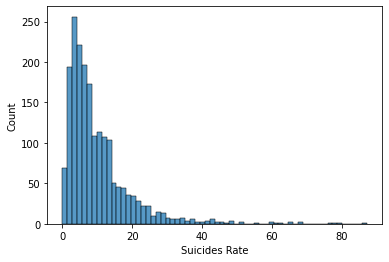

In [298]:
sns.histplot(df['Suicides Rate'])

<AxesSubplot:xlabel='Suicides Rate', ylabel='Count'>

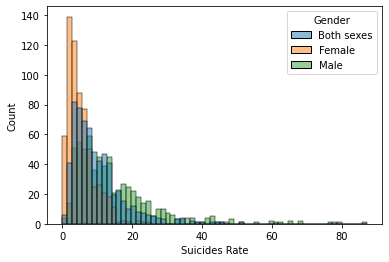

In [299]:
sns.histplot(x='Suicides Rate',data=df, hue='Gender')

In [313]:
def countriesGraph(df, countries, feature):
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_axes([0,0,1,1])
    for country in countries:
        m = df[(df['Country']==country)& (df['Gender']=='Both sexes')][['Year', feature]].dropna().values
        x = m[:,0]
        y = m[:,1]
        ax1.plot(x,y, label=country)
    fig.legend(fontsize=10)

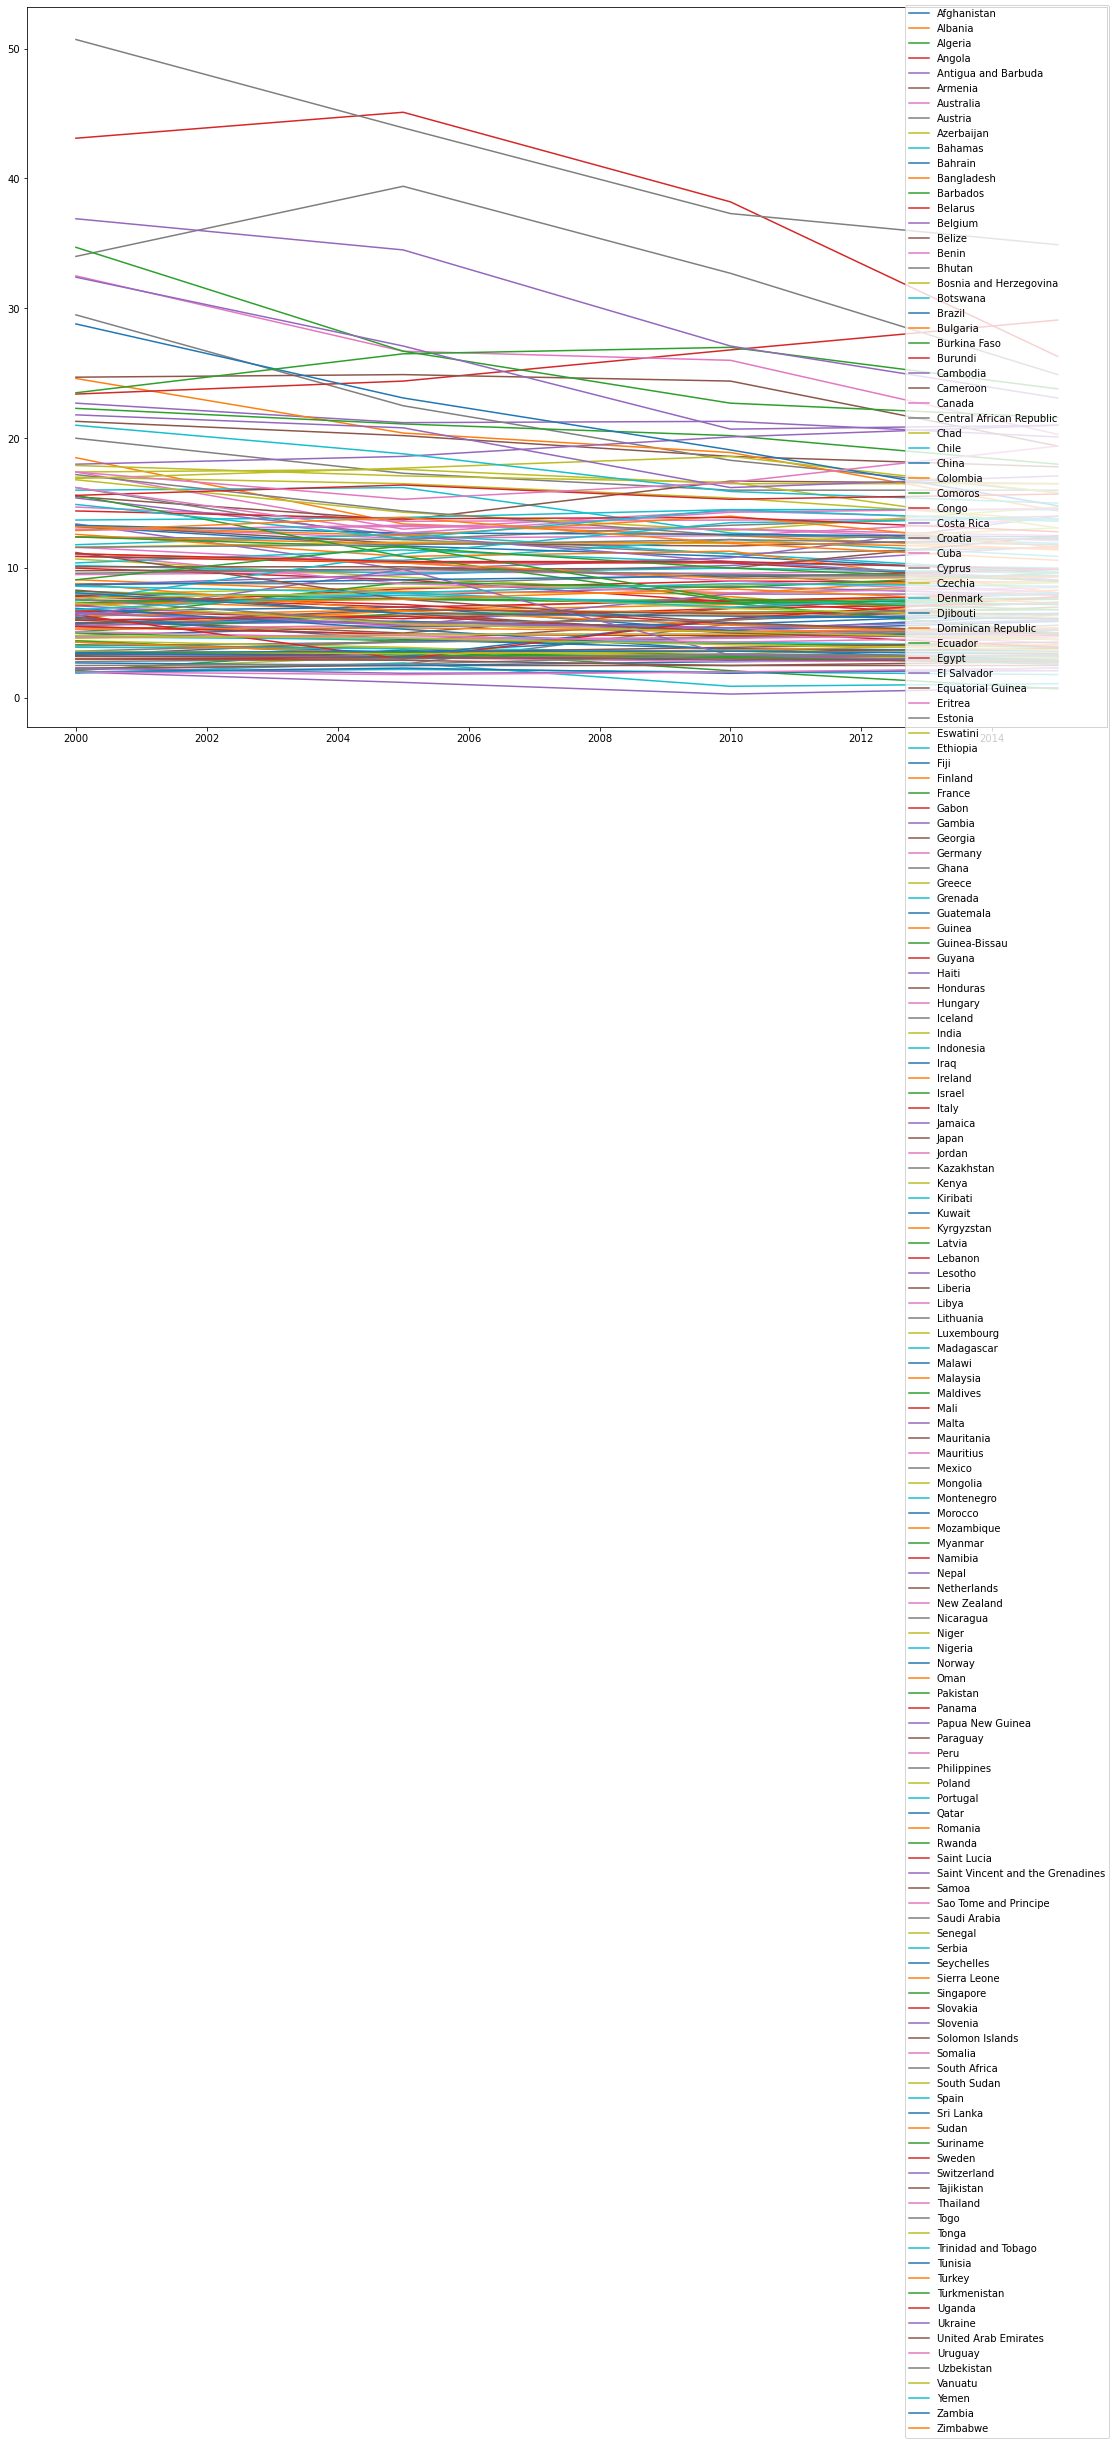

In [314]:
countriesSuicideRate = df[df['Suicides Rate'].notna()]['Country'].unique()
countriesGraph(df,countries=countriesSuicideRate, feature='Suicides Rate')

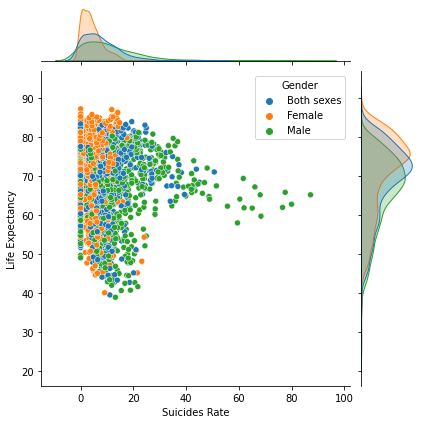

In [239]:
sns.jointplot(x='Suicides Rate', y='Life Expectancy', data=df, hue='Gender')

In [193]:
df

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,% Death Cardiovascular,Low CI Value % Death Cardiovascular,High CI Value % Death Cardiovascular,Suicides Rate,Alcohol Abuse,Air Pollution Death Rate Stroke,Low CI Value Air Pollution Death Rate Stroke,High CI Value Air Pollution Death Rate Stroke,Air Pollution Death Rate Stroke Age Standarized,Low CI Value Air Pollution Death Rate Stroke Age Standarized,High CI Value Air Pollution Death Rate Stroke Age Standarized,Air Pollution Death Rate Ischaemic Heart Disease,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease,High CI Value Air Pollution Death Rate Ischaemic Heart Disease,Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Low CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,High CI Value Air Pollution Death Rate Ischaemic Heart Disease Age Standarized,Air Pollution Death Rate Lower Respiratory Infections,Low CI Value Air Pollution Death Rate Lower Respiratory Infections,High CI Value Air Pollution Death Rate Lower Respiratory Infections,Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Low CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,High CI Value Air Pollution Death Rate Lower Respiratory Infections Age Standarized,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease,Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Low CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,High CI Value Air Pollution Death Rate Chronic Obstructive Pulmonary Disease Age Standarized,Air Pollution Death Rate Total,Low CI Value Air Pollution Death Rate Total,High CI Value Air Pollution Death Rate Total,Air Pollution Death Rate Total Age Standarized,Low CI Value Air Pollution Death Rate Total Age Standarized,High CI Value Air Pollution Death Rate Total Age Standarized,Air Pollution Death Rate Trachea Bronchus Lung Cancers,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers,Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Low CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,High CI Value Air Pollution Death Rate Trachea Bronchus Lung Cancers Age Standarized,Unsafe Wash Mortality Rate,Poisoning Mortality Rate,Tobacco Prevalence,% Population Aged 0-14,% Population Aged 15-64,% Population Aged 65+,% Population Aged 65-69,% Population Aged 70-74,% Population Aged 75-79,% Population Aged 80+,Maternal Mortality Ratio,Low CI Value Maternal Mortality Ratio,High CI Value Maternal Mortality Ratio,% of Births Attended By Skilled Personal,Neonatal Mortality Rate,Low CI Value Neonatal Mortality Rate,High CI Value Neonatal Mortality Rate,Incidence of Malaria,Incidence of Tuberculosis,Low CI Value Incidence of Tuberculosis,High CI Value Incidence of Tuberculosis,Hepatirus B Surface Antigen,Low CI Value Hepatirus B Surface Antigen,High CI Value Hepatirus B Surface Antigen,Intervention Against NTDs,Road Traffic Deaths,Reproductive Age Women,Adolescent Birth Rate,Universal Heath Care Coverage,Population 10 Percentage SDG Total,Population 10 Percentage SDG Urban,Population 10 Percentage SDG Rural,Population 25 Percentage SDG Total,Population 25 Percentage SDG Urban,Population 25 Percentage SDG Rural,Doctors,Nurses and Midwifes,Dentists,Pharmacists,Basic Drinking Water Services,Basic Sanization Services Total,Basic Sanization Services Urban,Basic Sanization Services Rural,Safely Sanitation Total,Safely Sanitation Urban,Safely Sanitation Rural,Basic Hand Washing Total,Basic Hand Washing

# Transformación de datos

Podemos realizar diferentes clasificaciones de países:
- Por zona geográfica
- Desarrollados, subdesarrollados y en vias de desarrollo
- Nutrición: https://knoema.es/infographics/gcaicze/difference-of-daily-diet-across-countries
- https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf
- etc.

- Country
    - Hacer clasificaciones de países (si procede porque al final puede ser una feature más realmente a partir de un csv)
    - Eliminamos la columna Country
- Year
    - Escalar
- Gender
    - Hacer Get Dummies con male y female y both sexes con ambos
- Infant Mortaity Rate
    - Escalar
- Under 5 Mortality Rate
    - Escalar
- % Deaths Cardiovascular
    - Normalizar o Estandarizar
- Suicides Rate
    - Escalar
    - NaNs: Quizá interpolar. Extrapolar no.

In [ ]:
#Country
    # Hacer clasificaciones de países (si procede porque al final puede ser una feature más realmente a partir de un csv)
    df.drop('Country',axis=1,inplace=True) #Eliminamos la columna Country
#Year
    df[['Year']] = MinMaxScaler().fit_transform(df[['Year']])#Escalar
#Gender
    #Hacer Get Dummies con male y female y both sexes con ambos
#Infant Mortaity Rate
    #Escalar
#Under  Mortality Rate
    #Escalar

# Tratamiento de valores vacíos (NaN)

In [5]:
#Número de NaNs que hay por fila
nans = []
for i in range(df.shape[0]):
    nans.append(df.loc[i].isna().sum().sum())
n_nans = np.array(nans)

Text(0, 0.5, 'Número de filas')

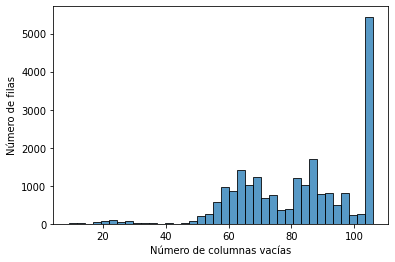

In [7]:
#Número de filas con N columnas vacías
sns.histplot(n_nans)
plt.xlabel('Número de columnas vacías')
plt.ylabel('Número de filas')

In [196]:
#Habrá que eliminar aquellas filas que tengan demasiados NaNs